#  Business Case: Walmart - Confidence Interval and CLT

**Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.**

### Business Problem

**The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).**

### DataSet


- User_ID:	User ID<br>
- Product_ID:	Product ID<br>
- Gender:	Sex of User<br>
- Age:	Age in bins<br>
- Occupation:	Occupation(Masked)<br>
- City_Category: Category of the City (A,B,C)<br>
- StayInCurrentCityYears:	Number of years stay in current city<br>
- Marital_Status:	Marital Status<br>
- ProductCategory: Product Category (Masked)<br>
- Purchase:	Purchase Amount<br>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import binom, norm

In [2]:
original_data = pd.read_csv('walmart_data.csv')
data = original_data.copy(deep=True)
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [3]:
data.shape

(550068, 10)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [5]:
# Let's check for null values
data.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [6]:
data.duplicated().value_counts()

False    550068
Name: count, dtype: int64

#### Observation of Data
- From the above analysis, we can see that there are 550068 rows of data and 10 columns that have information about the customer
- We can see there are several columns that has type int and object but except purchase all other columns are categorical.
- There are neither null values nor Duplicates we can say that the data is clean to be work with.
- But before that let's change the data type of columns into category

In [7]:
for i in data.columns[:-1]: # since last columns is purchase where dtype as int is correct
    data[i] = data[i].astype("category")
    
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  category
 1   Product_ID                  550068 non-null  category
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  category
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  category
 9   Purchase                    550068 non-null  int64   
dtypes: category(9), int64(1)
memory usage: 10.3 MB


In [8]:
data.describe(include='category')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category
count,550068,550068,550068,550068,550068,550068,550068,550068,550068
unique,5891,3631,2,7,21,3,5,2,20
top,1001680,P00265242,M,26-35,4,B,1,0,5
freq,1026,1880,414259,219587,72308,231173,193821,324731,150933


#### By this method we do get the breif idea of how data looks like. We get the Basic analysis with just one line of code.
#### Basic Analysis includes unique counts of Customers, Products etc, Top performer with respect to the each column.
#### But we have to do something more in order to extract insights from the data to improve the Business.



In [9]:
data.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

### Customer's Distribution
- There are 5891 unique customers on the day of Black Friday sale
- Total 3631 different Products were sold on that day
- People who came to Walmart are into 21 different Occupations
- Coming from 3 different Cities

### Now let's check about the "Purchase" Columns as Valuable Hidden Diamonds are in this Column.

In [10]:
purchase_summary = data.describe().reset_index()
purchase_summary.columns = ["Stats", "Purchase"]
purchase_summary

,Stats,Purchase
0,count,550068.000000
1,mean,9263.968713
2,std,5023.065394
3,min,12.000000
4,25%,5823.000000
5,50%,8047.000000
6,75%,12054.000000
7,max,23961.000000


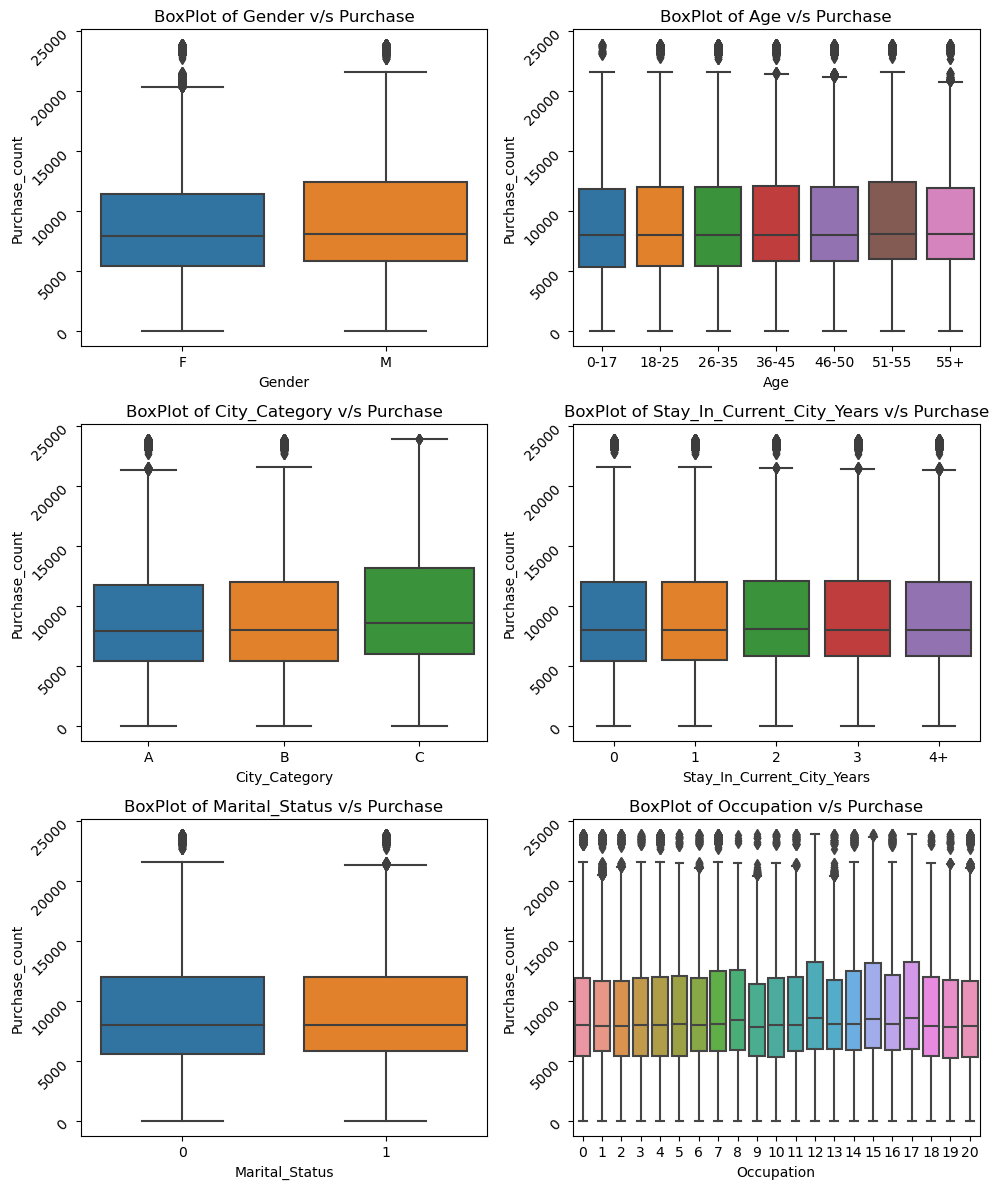

In [11]:
plt.figure(figsize=(10,12))

plot_columns = ['Gender', "Age", "City_Category", "Stay_In_Current_City_Years", "Marital_Status", "Occupation"]
for i,column in enumerate(plot_columns,1):
    plt.subplot(3,2,i)
    sns.boxplot(data=data, x=column, y="Purchase")
    plt.title(f"BoxPlot of {column} v/s Purchase")
    plt.xlabel(column)
    plt.yticks(rotation=45)
    plt.ylabel("Purchase_count")

plt.tight_layout()
plt.show()


#### Let's categorize gender then check statistic of purchases

In [12]:
gender_purchase_data = data.groupby(by="Gender")["Purchase"]
gender_purchase_data.describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


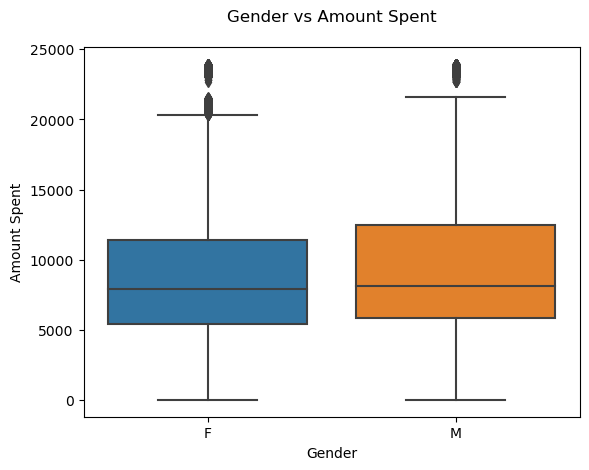

In [13]:
sns.boxplot(data = data, x="Gender", y= "Purchase")
plt.ylabel("Amount Spent")
plt.title("Gender vs Amount Spent\n")
plt.show()

## Do some data exploration steps like:
- Tracking the amount spent per transaction of all the 50 million female customers, and all the 50 million male customers, calculate the average, and conclude the results.
- Inference after computing the average female and male expenses.
- Use the sample average to find out an interval within which the population average will lie. Using the sample of female customers you will calculate the interval within which the average spending of 50 million male and female customers may lie.

In [14]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [15]:
avg_purchase_per_item = data.groupby(by= ['Gender'])["Purchase"].mean().reset_index()
avg_purchase_per_item

,Gender,Purchase
0,F,8734.565765
1,M,9437.526040


### Insight: 
Male has mean 9437.6 Average amount spend on each item which is greater than that of Female whereas Female has 8735 Average amount spent on each item and it is obvious that Male spent more amount per each transaction or bougth expensive items than female during the black friday sale.

In [16]:
female_data = data[data["Gender"]=="F"]
male_data = data[data["Gender"]=="M"]

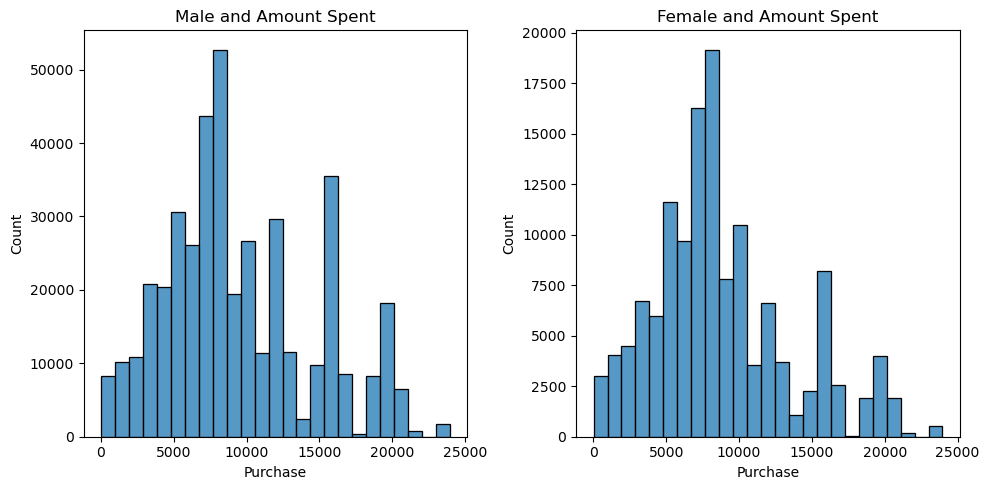

In [17]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(male_data["Purchase"], bins=25)
plt.title("Male and Amount Spent")

plt.subplot(1,2,2)
sns.histplot(female_data["Purchase"], bins=25)
plt.title("Female and Amount Spent")


plt.tight_layout()
plt.show()

### Observation
The data of both male and female purchases are right skewed in order to make the graph normal distribution we take the sample

In [18]:
sample_size = 300 #the bigger the sample, the accurate the data close to population
no_of_samples = 1000

In [19]:
means_of_males = []
for i in range(no_of_samples):
    means_of_males.append(male_data.sample(sample_size)["Purchase"].mean())

In [20]:
means_of_females = []
for i in range(no_of_samples):
    means_of_females.append(female_data.sample(sample_size)["Purchase"].mean())

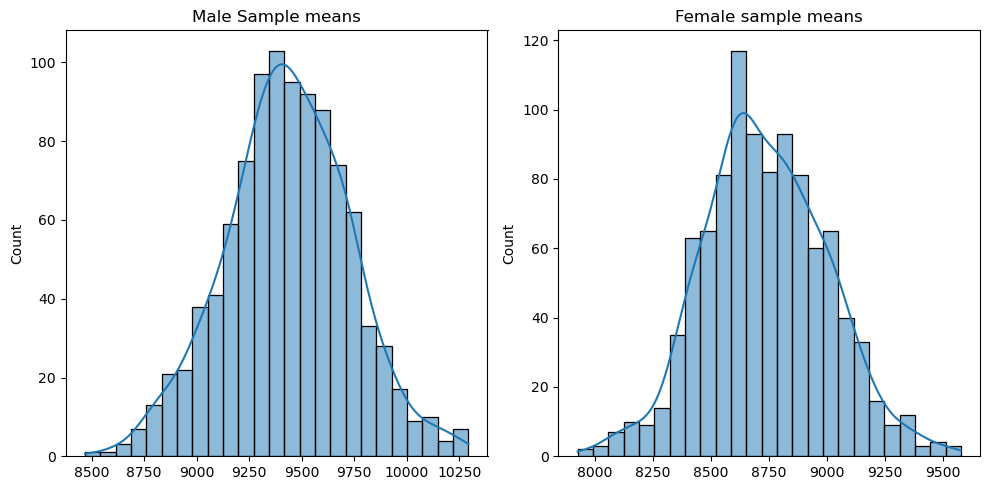

In [21]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(means_of_males, bins=25, kde=True)
plt.title("Male Sample means")

plt.subplot(1,2,2)
sns.histplot(means_of_females, bins=25, kde=True)
plt.title("Female sample means")


plt.tight_layout()
plt.show()

### Calculating the Confidence Interval for 90, 95, 99 percentiles

Z-Score = 1.645(90), 1.96(95), 2.576(99)
min = mean - z*(std_error)
max = mean + z*(std_error)

std_error = std_dev/np.sqrt(sample_size)

#### 90% Confidence Interval

In [22]:
z = 1.645

# Male 
male_min = np.mean(means_of_males) - z*np.std(means_of_males)
male_max = np.mean(means_of_males) + z*np.std(means_of_males)

# Female
female_min = np.mean(means_of_females) - z*np.std(means_of_females)
female_max = np.mean(means_of_females) + z*np.std(means_of_females)

print("90% Confidence Interval:")
print(f"Confidence Interval of 90% in males spending means: ({male_min}, {male_max})")
print(f"Confidence Interval of 90% in female spending means: ({female_min}, {female_max})")

90% Confidence Interval:
Confidence Interval of 90% in males spending means: (8944.797023270416, 9922.781050062915)
Confidence Interval of 90% in female spending means: (8296.946810932952, 9174.035355733713)


#### 95% Confidence Interval

In [23]:
z = 1.96

# Male 
male_min = np.mean(means_of_males) - z*np.std(means_of_males)
male_max = np.mean(means_of_males) + z*np.std(means_of_males)

# Female
female_min = np.mean(means_of_females) - z*np.std(means_of_females)
female_max = np.mean(means_of_females) + z*np.std(means_of_females)

print("95% Confidence Interval:")
print(f"Confidence Interval of 95% in males spending means: ({male_min}, {male_max})")
print(f"Confidence Interval of 95% in female spending means: ({female_min}, {female_max})")

95% Confidence Interval:
Confidence Interval of 95% in males spending means: (8851.16025474773, 10016.4178185856)
Confidence Interval of 95% in female spending means: (8212.970248132879, 9258.011918533786)


#### 99% Confidence Interval

In [24]:
z = 2.576

# Male 
male_min = np.mean(means_of_males) - z*np.std(means_of_males)
male_max = np.mean(means_of_males) + z*np.std(means_of_males)

# Female
female_min = np.mean(means_of_females) - z*np.std(means_of_females)
female_max = np.mean(means_of_females) + z*np.std(means_of_females)

print("99% Confidence Interval:")
print(f"Confidence Interval of 99% in males spending means: ({male_min}, {male_max})")
print(f"Confidence Interval of 99% in female spending means: ({female_min}, {female_max})")

99% Confidence Interval:
Confidence Interval of 99% in males spending means: (8668.04835185892, 10199.52972147441)
Confidence Interval of 99% in female spending means: (8048.749414212736, 9422.232752453929)


### Insight: 
#### Confidence Interval Overlap:
The confidence intervals for male and female spending overlap at all confidence levels (90%, 95%, 99%). This indicates while male spending is more but ther is no significant difference in the average spending between genders.

#### Gender-Based Segmentation Not Required:
Since the confidence intervals overlap, gender-based segmentation for marketing or pricing may not be necessary. Both genders show similar average spending.

## Let's Check this for the all the different Categories

## Married V/S Unmarried

In [25]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [26]:
married_data = data[data["Marital_Status"]==1]
unmarried_data = data[data["Marital_Status"]==0]

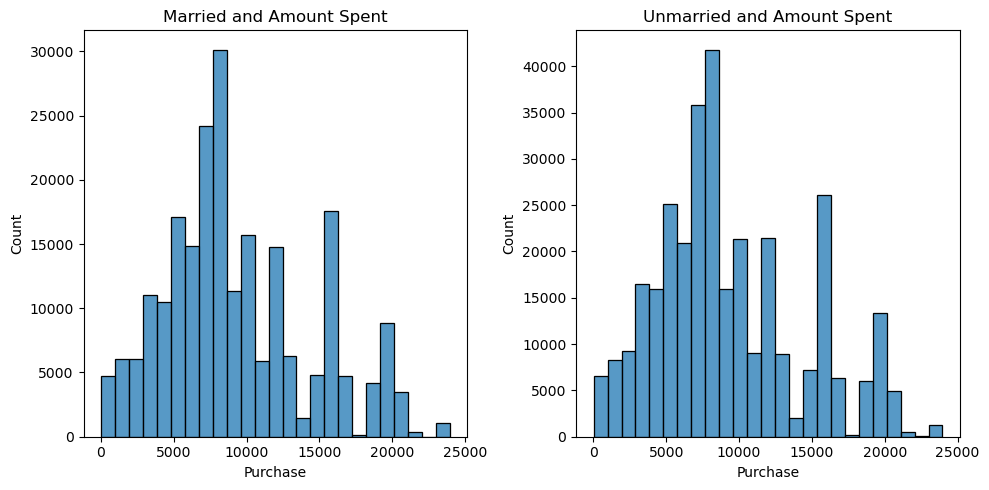

In [27]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(married_data["Purchase"], bins=25)
plt.title("Married and Amount Spent")

plt.subplot(1,2,2)
sns.histplot(unmarried_data["Purchase"], bins=25)
plt.title("Unmarried and Amount Spent")


plt.tight_layout()
plt.show()

In [28]:
sample_size = 300 #the bigger the sample, the accurate the data close to population
no_of_samples = 1000

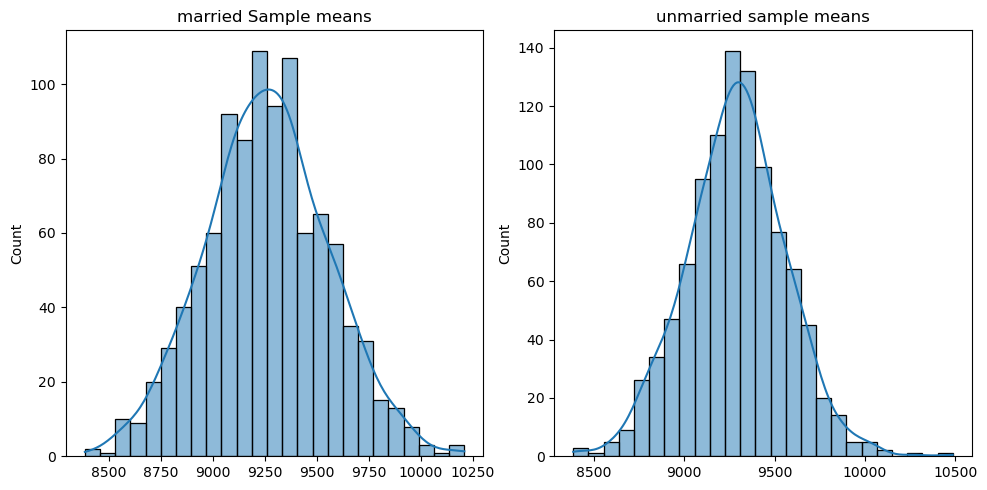

In [29]:
means_of_married = []
for i in range(no_of_samples):
    means_of_married.append(married_data.sample(sample_size)["Purchase"].mean())
    
means_of_unmarried = []
for i in range(no_of_samples):
    means_of_unmarried.append(unmarried_data.sample(sample_size)["Purchase"].mean())


# after sampling plotting the graph to check the distribution
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(means_of_married, bins=25, kde=True)
plt.title("married Sample means")

plt.subplot(1,2,2)
sns.histplot(means_of_unmarried, bins=25, kde=True)
plt.title("unmarried sample means")


plt.tight_layout()
plt.show()

### Calculating CIs for the Married and Unmarried (90,95,99)

In [30]:
z90 = 1.645

# married 
married_min = np.mean(means_of_married) - z90*np.std(means_of_married)
married_max = np.mean(means_of_married) + z90*np.std(means_of_married)

# unmarried
unmarried_min = np.mean(means_of_unmarried) - z90*np.std(means_of_unmarried)
unmarried_max = np.mean(means_of_unmarried) + z90*np.std(means_of_unmarried)

print("90% Confidence Interval:")
print(f"Confidence Interval of 90% in married spending means: ({married_min}, {married_max})")
print(f"Confidence Interval of 90% in unmarried spending means: ({unmarried_min}, {unmarried_max})")

#95 Confidence Interval
z95 = 1.96

# married 
married_min = np.mean(means_of_married) - z95*np.std(means_of_married)
married_max = np.mean(means_of_married) + z95*np.std(means_of_married)

# unmarried
unmarried_min = np.mean(means_of_unmarried) - z95*np.std(means_of_unmarried)
unmarried_max = np.mean(means_of_unmarried) + z95*np.std(means_of_unmarried)

print("\n95% Confidence Interval:")
print(f"Confidence Interval of 95% in married spending means: ({married_min}, {married_max})")
print(f"Confidence Interval of 95% in unmarried spending means: ({unmarried_min}, {unmarried_max})")

#99 Confidence Interval
z99 = 2.576

# married 
married_min = np.mean(means_of_married) - z99*np.std(means_of_married)
married_max = np.mean(means_of_married) + z99*np.std(means_of_married)

# unmarried
unmarried_min = np.mean(means_of_unmarried) - z99*np.std(means_of_unmarried)
unmarried_max = np.mean(means_of_unmarried) + z99*np.std(means_of_unmarried)

print("\n99% Confidence Interval:")
print(f"Confidence Interval of 99% in married spending means: ({married_min}, {married_max})")
print(f"Confidence Interval of 99% in unmarried spending means: ({unmarried_min}, {unmarried_max})")

90% Confidence Interval:
Confidence Interval of 90% in married spending means: (8774.291879625947, 9746.282160374056)
Confidence Interval of 90% in unmarried spending means: (8833.154993604734, 9740.514513061935)

95% Confidence Interval:
Confidence Interval of 95% in married spending means: (8681.228980405383, 9839.34505959462)
Confidence Interval of 95% in unmarried spending means: (8746.280145997129, 9827.38936066954)

99% Confidence Interval:
Confidence Interval of 99% in married spending means: (8499.239310818502, 10021.3347291815)
Confidence Interval of 99% in unmarried spending means: (8576.391555120037, 9997.277951546632)


### Insight: 
#### Confidence Interval Overlap:
The confidence intervals for married and unmarriedried spending overlap at all confidence levels (90%, 95%, 99%).It is almost the same. Purchases doesn't depent on Marital Status. So while marketing or releasing offers we no need to conclude the Marital Status since there is no much signficant difference.


## Let's explore Age to get any insights from it.

In [31]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [32]:
data["Age"].value_counts()

Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64

The age group of (26-35) has made more purchases followed by (36-45) age group

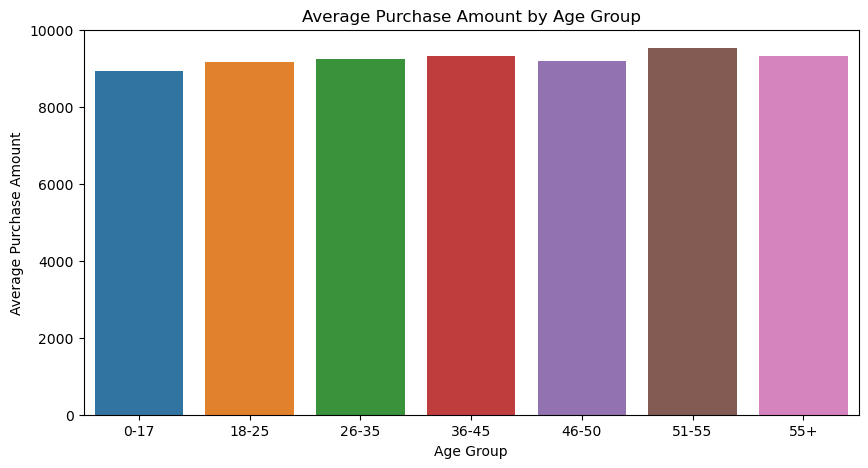

In [33]:
# Group data by age and calculate average purchase
age_purchase_data = data.groupby(by="Age")["Purchase"].mean().reset_index()

# Create a bar plot to visualize average purchase across age groups
plt.figure(figsize=(10, 5))
sns.barplot(x="Age", y="Purchase", data=age_purchase_data)
plt.title("Average Purchase Amount by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Purchase Amount")
plt.show()

In [36]:
age_group_data = {}
for age_group in data['Age'].unique():
    age_group_data[age_group] = data[data['Age'] == age_group]

['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']
Categories (7, object): ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

In [40]:
sample_size = 300
no_of_samples = 1000
means_of_age_groups = {}

age_intervals = data['Age'].unique()  # Get unique age intervals

for age_interval in age_intervals:
    means_of_age_groups[age_interval] = []
    for _ in range(no_of_samples):
        # Sample with replacement to ensure sufficient samples for smaller age groups
        sample = data[data['Age'] == age_interval].sample(sample_size, replace=True)
        means_of_age_groups[age_interval].append(sample["Purchase"].mean())

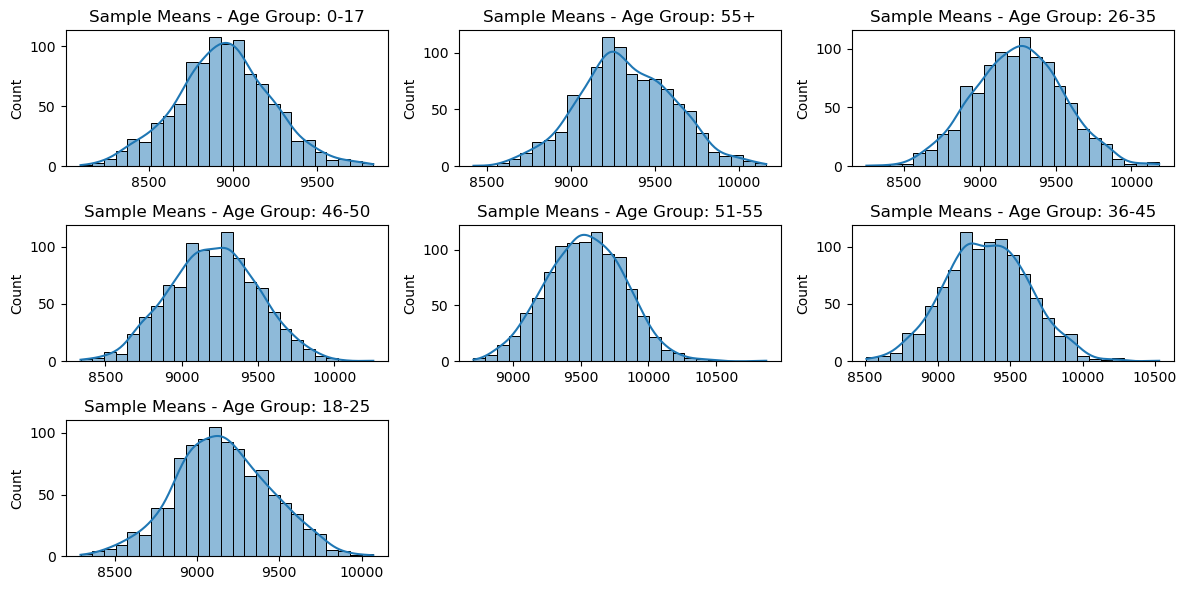

In [41]:
# Plot the distribution of sample means for each age group
plt.figure(figsize=(12, 6))
for i, (age_group, means) in enumerate(means_of_age_groups.items(), 1):
    plt.subplot(3, 3, i)
    sns.histplot(means, bins=25, kde=True)
    plt.title(f"Sample Means - Age Group: {age_group}")
plt.tight_layout()
plt.show()

In [42]:
z = [[1.2815515655446004, 1.6448536269514722, 2.3263478740408408],[90,95,99]]  # for 90%, 95%, 99% confidence intervals
percents = [90,95,99]
for i in range(len(z[0])):
  print(f"\nConfidence Intervals:({z[1][i]})%")
  for age_group, means in means_of_age_groups.items():
      age_min = np.mean(means) - z[0][i] * np.std(means)
      age_max = np.mean(means) + z[0][i] * np.std(means)
      print(f"Age Group {age_group}: ({age_min:.2f}, {age_max:.2f})")


Confidence Intervals:(90)%
Age Group 0-17: (8580.85, 9305.90)
Age Group 55+: (8969.46, 9688.51)
Age Group 26-35: (8878.90, 9631.43)
Age Group 46-50: (8838.10, 9577.93)
Age Group 51-55: (9167.74, 9907.24)
Age Group 36-45: (8971.51, 9713.45)
Age Group 18-25: (8787.31, 9526.35)

Confidence Intervals:(95)%
Age Group 0-17: (8478.08, 9408.67)
Age Group 55+: (8867.54, 9790.43)
Age Group 26-35: (8772.24, 9738.10)
Age Group 46-50: (8733.23, 9682.79)
Age Group 51-55: (9062.92, 10012.06)
Age Group 36-45: (8866.35, 9818.62)
Age Group 18-25: (8682.56, 9631.10)

Confidence Intervals:(99)%
Age Group 0-17: (8285.30, 9601.45)
Age Group 55+: (8676.36, 9981.62)
Age Group 26-35: (8572.15, 9938.19)
Age Group 46-50: (8536.52, 9879.50)
Age Group 51-55: (8866.30, 10208.68)
Age Group 36-45: (8669.08, 10015.89)
Age Group 18-25: (8486.05, 9827.60)


## Insights based on Age Group:

**Highest Spending**: The age group of 26-35 has the highest average purchase amount, followed by the 36-45 age group. This indicates that these are the most valuable customer segments for Walmart.<br>
**55+ Segment**: The 55+ age group exhibits slightly lower spending than the 26-35 and 36-45 age groups.<br>
**0-17 Segment:** The 0-17 segment has the lowest average purchase amount, which is expected as this group is less likely to have independent purchasing power.

### Target High-Spending Age Groups:

Personalized Recommendations: Implement personalized product recommendations and targeted marketing campaigns for the 26-35 and 36-45 age groups, focusing on products they are more likely to purchase.

### Increase Engagement with 55+ Segment:
Ensure that stores and online platforms are easily accessible for older customers. Offer larger fonts, clear navigation, and dedicated customer support channels.

## Overall Insights:

**Gender Spending:** Although male customers exhibit a slightly higher average purchase amount, the difference is not statistically significant. Gender-based segmentation may not be necessary for marketing or pricing strategies.

**Marital Status:** There is no significant difference in purchase behavior between married and unmarried customers. Marital status may not be a strong predictor of spending habits.

**Age Group:** The 26-35 and 36-45 age groups are the highest-spending segments, while the 55+ segment spends slightly less and the 0-17 segment spends the least. Age group appears to be a more significant factor in purchase behavior than gender or marital status.

## Actionable Items:

Here are some key actionable items based on the insights:

### Target High-Spending Segments:

**Focus on Age**: Prioritize the 26-35 and 36-45 age groups with targeted marketing campaigns, personalized recommendations, and loyalty programs.
Tailored Product Bundles: Offer product bundles that appeal to the needs and preferences of these age groups.
Increase Engagement Across All Segments:

**Enhance Customer Experience:** Improve store layout, website navigation, and customer service to create a positive experience for all customers.
Promotions and Discounts: Run promotions and discounts to attract customers across different age groups and categories.
Seasonal Marketing: Capitalize on seasonal events like Black Friday, back-to-school, and holidays with specific marketing strategies.
### Product and Inventory Management:

**Optimize Inventory:** Ensure sufficient inventory of products that are popular with high-spending age groups.
Personalized Recommendations: Utilize data to personalize product recommendations for individual customers based on their purchase history and preferences.<br>
Product Variety: Offer a diverse range of products to cater to the needs and preferences of different customer segments.